# Importing Libraries and Read the File(dataset)

In [38]:
import numpy as np 
import pandas as pd 

# Graph
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
d = pd.read_csv(r"E:\bike_riding\Original_Riding_accesory.csv")
d.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2/19/2016,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80,109
1,1,2/20/2016,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49,57
2,2,2/27/2016,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11,15
3,3,03-12-2016,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175,233
4,4,03-12-2016,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105,125


In [40]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34866 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  int64  
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  int64  
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  int64  
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  int64  
 14  Revenue           34866 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 4.0+ MB


In [41]:
d.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,17432.500000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870074
std,10065.091579,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.650597
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000
25%,8716.250000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000
50%,17432.500000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000
75%,26148.750000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000
max,34865.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000


In [42]:
d.isnull().sum()

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64

In [43]:
print(d)

       index        Date  Year     Month  Customer Age Customer Gender  \
0          0   2/19/2016  2016  February            29               F   
1          1   2/20/2016  2016  February            29               F   
2          2   2/27/2016  2016  February            29               F   
3          3  03-12-2016  2016     March            29               F   
4          4  03-12-2016  2016     March            29               F   
...      ...         ...   ...       ...           ...             ...   
34861  34861   3/22/2015  2015     March            38               M   
34862  34862  02-07-2016  2016  February            38               M   
34863  34863   3/13/2015  2015     March            38               M   
34864  34864  04-05-2015  2015     April            38               M   
34865  34865   8/30/2015  2015    August            38               M   

             Country              State Product Category     Sub Category  \
0      United States         Washi

In [44]:
categorical_columns = ['Country', 'State', 'Product Category', 'Sub Category', 'Quantity'] # Select only object (string) type columns

for column in categorical_columns:
    unique_values = d[column].unique()
    print(f"-> Unique values in column '{column}':\n {unique_values}\n")


-> Unique values in column 'Country':
 ['United States' 'France' 'United Kingdom' 'Germany']

-> Unique values in column 'State':
 ['Washington' 'California' 'Oregon' 'Essonne' 'Yveline' 'England' 'Hessen'
 'Hamburg' 'Seine Saint Denis' 'Saarland' 'Nordrhein-Westfalen' 'Bayern'
 'Seine (Paris)' 'Pas de Calais' 'Moselle' 'Hauts de Seine' 'Nord'
 'Seine et Marne' 'Loiret' 'Charente-Maritime' 'Loir et Cher'
 'Brandenburg' 'Alabama' "Val d'Oise" 'Val de Marne' 'Minnesota' 'Wyoming'
 'Ohio' 'Garonne (Haute)' 'Kentucky' 'Texas' 'Missouri' 'Somme' 'New York'
 'Florida' 'Illinois' 'South Carolina' 'North Carolina' 'Georgia'
 'Virginia' 'Mississippi' 'Montana' 'Arizona' 'Massachusetts' 'Utah']

-> Unique values in column 'Product Category':
 ['Accessories' 'Clothing' 'Bikes']

-> Unique values in column 'Sub Category':
 ['Tires and Tubes' 'Gloves' 'Helmets' 'Bike Stands' 'Mountain Bikes'
 'Hydration Packs' 'Jerseys' 'Fenders' 'Cleaners' 'Socks' 'Caps'
 'Touring Bikes' 'Bottles and Cages' 'Vests

In [45]:
for column in categorical_columns:
    category_counts = d[column].value_counts()
    print("\n->Counts for each category in column '{}'".format(column))
    print(category_counts)
    


->Counts for each category in column 'Country'
Country
United States     18076
United Kingdom     6421
Germany            5201
France             5168
Name: count, dtype: int64

->Counts for each category in column 'State'
State
California             10332
England                 6421
Washington              5204
Oregon                  2446
Saarland                1287
Nordrhein-Westfalen     1171
Hessen                  1112
Seine (Paris)           1092
Hamburg                  869
Seine Saint Denis        796
Nord                     787
Bayern                   668
Hauts de Seine           509
Essonne                  465
Yveline                  442
Seine et Marne           183
Moselle                  181
Loiret                   178
Val d'Oise               130
Garonne (Haute)          100
Brandenburg               94
Val de Marne              75
Charente-Maritime         70
Somme                     61
Loir et Cher              57
Pas de Calais             42
Illinois        

# pre-processing on dataset

# 1)Removing unwanted features(columns), Rows from train and test dataset

In [46]:
d.drop(['Customer Age','Customer Gender'],axis=1,inplace=True)

In [47]:
# Removing Rows having very less State value_counts(outliers) 

value_count= d['State'].value_counts()
value_to_keep= value_count[value_count>200].index

d= d[d['State'].isin(value_to_keep)]
#d.to_csv(r"E:\bike_riding\filtered_dataset.csv",index=False)

In [48]:
d

,index,Date,Year,Month,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2/19/2016,2016,February,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80,109
1,1,2/20/2016,2016,February,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49,57
2,2,2/27/2016,2016,February,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11,15
3,3,03-12-2016,2016,March,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175,233
4,4,03-12-2016,2016,March,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34860,34860,2/24/2016,2016,February,Germany,Bayern,Bikes,Mountain Bikes,2,384.50,536.000000,769,1072
34862,34862,02-07-2016,2016,February,France,Hauts de Seine,Bikes,Mountain Bikes,2,1160.00,985.500000,2320,1971
34863,34863,3/13/2015,2015,March,France,Hauts de Seine,Bikes,Mountain Bikes,1,2049.00,1583.000000,2049,1583
34864,34864,04-05-2015,2015,April,France,Hauts de Seine,Bikes,Mountain Bikes,3,683.00,560.666667,2049,1682


# 2)Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

encode = ['Country', 'State', 'Product Category', 'Sub Category']

for column in encode:
    d[column] = label_encoder.fit_transform(d[column])

In [50]:
d.to_csv(r"E:\bike_riding\Riding_accesory.csv",index=False)

In [51]:
d

,index,Date,Year,Month,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2/19/2016,2016,February,3,13,0,14,1,80.00,109.000000,80,109
1,1,2/20/2016,2016,February,3,13,2,6,2,24.50,28.500000,49,57
2,2,2/27/2016,2016,February,3,13,0,14,3,3.67,5.000000,11,15
3,3,03-12-2016,2016,March,3,13,0,14,2,87.50,116.500000,175,233
4,4,03-12-2016,2016,March,3,13,0,14,3,35.00,41.666667,105,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34860,34860,2/24/2016,2016,February,1,0,1,10,2,384.50,536.000000,769,1072
34862,34862,02-07-2016,2016,February,0,5,1,10,2,1160.00,985.500000,2320,1971
34863,34863,3/13/2015,2015,March,0,5,1,10,1,2049.00,1583.000000,2049,1583
34864,34864,04-05-2015,2015,April,0,5,1,10,3,683.00,560.666667,2049,1682


# Spliting dataset into train & test data

In [52]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset into data variable for shuffle
data = pd.read_csv(r"E:\bike_riding\Riding_accesory.csv")

# Randomly shuffle the dataset
data= shuffle(data, random_state=42)

# Determine the ratio for train-test split (e.g., 80% train, 20% test)
train_ratio = 0.8
test_ratio = 1 - train_ratio

# Split the dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=test_ratio, random_state=42)

# Save the train and test datasets to CSV files
train_data.to_csv(r"E:\bike_riding\train_data.csv", index=False)
test_data.to_csv(r"E:\bike_riding\test_data.csv", index=False)

In [53]:
print(data) #Shuffled dataset

       index        Date  Year      Month  Country  State  Product Category  \
12051  12563   1/27/2016  2016    January        2      2                 1   
23002  23888   1/17/2016  2016    January        1      0                 0   
16337  16980   9/19/2015  2015  September        3      1                 0   
14224  14786  12-03-2015  2015   December        2      2                 1   
8913    9296  10/23/2015  2015    October        3      9                 0   
...      ...         ...   ...        ...      ...    ...               ...   
16850  17507  02-01-2016  2016   February        1      6                 0   
6265    6572   6/16/2016  2016       June        2      2                 2   
11284  11748  12/14/2015  2015   December        2      2                 0   
860      884  02-01-2016  2016   February        0     12                 1   
15795  16427  06-07-2016  2016       June        3      1                 0   

       Sub Category  Quantity  Unit Cost   Unit Pri

In [54]:
df_train = pd.read_csv(r"E:\bike_riding\train_data.csv")

In [55]:
df_train

,index,Date,Year,Month,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,30592,11/20/2015,2015,November,2,2,0,14,2,26.00,30.500000,52,61
1,8363,5/23/2016,2016,May,2,2,2,12,2,945.00,1362.000000,1890,2724
2,22207,4/28/2016,2016,April,3,1,0,14,1,2.00,3.000000,2,3
3,19440,7/16/2016,2016,July,3,9,2,16,3,42.33,53.666667,127,161
4,21833,05-07-2016,2016,May,3,13,2,3,1,252.00,262.000000,252,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26875,25496,6/20/2016,2016,June,0,5,2,3,1,216.00,334.000000,216,334
26876,19741,1/21/2016,2016,January,3,1,1,11,1,540.00,612.000000,540,612
26877,5219,7/27/2015,2015,July,3,9,1,11,1,540.00,484.000000,540,484
26878,30926,12/26/2015,2015,December,2,2,0,7,3,291.67,308.333333,875,925


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26880 entries, 0 to 26879
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             26880 non-null  int64  
 1   Date              26880 non-null  object 
 2   Year              26880 non-null  int64  
 3   Month             26880 non-null  object 
 4   Country           26880 non-null  int64  
 5   State             26880 non-null  int64  
 6   Product Category  26880 non-null  int64  
 7   Sub Category      26880 non-null  int64  
 8   Quantity          26880 non-null  int64  
 9   Unit Cost         26880 non-null  float64
 10  Unit Price        26880 non-null  float64
 11  Cost              26880 non-null  int64  
 12  Revenue           26880 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 2.7+ MB


In [57]:
df_train.describe()

,index,Year,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000
mean,17461.436942,2015.568043,2.139993,5.413467,0.506027,9.403013,2.001935,350.108691,389.876891,576.958668,642.211458
std,10058.897438,0.495358,1.074241,4.784934,0.744163,4.608151,0.814502,491.651732,528.330945,692.463278,738.941888
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.670000,0.666667,2.000000,2.000000
25%,8726.250000,2015.000000,1.000000,1.000000,0.000000,6.000000,1.000000,45.000000,54.000000,85.000000,103.000000
50%,17468.500000,2016.000000,3.000000,2.000000,0.000000,10.000000,2.000000,150.000000,179.333333,261.000000,317.000000
75%,26131.250000,2016.000000,3.000000,10.000000,1.000000,14.000000,3.000000,450.000000,520.083333,769.000000,900.250000
max,34865.000000,2016.000000,3.000000,14.000000,2.000000,16.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000


In [58]:
df_test = pd.read_csv(r"E:\bike_riding\test_data.csv")

In [59]:
df_train.columns

Index(['index', 'Date', 'Year', 'Month', 'Country', 'State',
       'Product Category', 'Sub Category', 'Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue'],
      dtype='object')

In [60]:
X = df_train[['Country', 'State', 'Product Category', 'Sub Category']]
Y = df_train['Revenue']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardization

In [61]:
X.describe()

,Country,State,Product Category,Sub Category
count,26880.000000,26880.000000,26880.000000,26880.000000
mean,2.139993,5.413467,0.506027,9.403013
std,1.074241,4.784934,0.744163,4.608151
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,6.000000
50%,3.000000,2.000000,0.000000,10.000000
75%,3.000000,10.000000,1.000000,14.000000
max,3.000000,14.000000,2.000000,16.000000


In [62]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [63]:
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

In [64]:
X_train_std

array([[ 0.8009963 ,  1.58169823, -0.67792583, -0.51546611],
       [-0.13056803, -0.71573273, -0.67792583, -0.51546611],
       [-0.13056803, -0.71573273, -0.67792583, -0.51546611],
       ...,
       [-1.06213235, -1.13344745,  0.66580327,  0.3518552 ],
       [ 0.8009963 , -0.92459009,  2.00953237,  0.78551586],
       [ 0.8009963 , -0.92459009, -0.67792583,  1.00234618]])

In [65]:
X_test_std

array([[ 0.8009963 ,  1.58169823,  2.00953237, -0.08180545],
       [ 0.8009963 ,  1.58169823, -0.67792583,  1.00234618],
       [-0.13056803, -0.71573273,  0.66580327,  0.3518552 ],
       ...,
       [-1.99369668,  1.16398351, -0.67792583,  1.00234618],
       [ 0.8009963 , -0.92459009, -0.67792583,  1.00234618],
       [ 0.8009963 , -0.92459009,  0.66580327,  0.3518552 ]])

In [66]:
Y_train

836      1177
16872     218
3566      113
25048     141
5551     1045
         ... 
21575      25
5390      311
860      1914
15795     288
23654      23
Name: Revenue, Length: 21504, dtype: int64

In [67]:
Y_test

6422     1309
3399      339
16451    2086
18159      70
11456     134
         ... 
25554      50
6494       40
4834     1002
3612      342
9928     1030
Name: Revenue, Length: 5376, dtype: int64

In [68]:
import joblib

joblib.dump(sc,r"E:\bike_riding\sc.sav")

['E:\\bike_riding\\sc.sav']

# Training Linear Regression model

In [69]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

#print("Coefficients:", model.coef_)
#print("Intercept:", model.intercept_)

In [70]:
joblib.dump(model,r"E:\bike_riding\lr.sav")

['E:\\bike_riding\\lr.sav']

In [71]:
data_to_predict = df_train[['Country', 'State', 'Product Category', 'Sub Category']].head(5)
predictions = model.predict(data_to_predict)

print(predictions)

[ 596.42580684 1283.65694319  538.89466467 1311.58974077  948.57962281]


# Evaluation

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r_squared = r2_score(Y_test, Y_pred)

#print above values
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R-squared (R2): {:.2f}".format(r_squared))

Mean Absolute Error (MAE): 505.39
Mean Squared Error (MSE): 454469.42
Root Mean Squared Error (RMSE): 674.14
R-squared (R2): 0.18


C:\Users\KUSHAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
coefficients= pd.DataFrame({'Feature':X_train.columns, 'Coefficients':model.coef_})

print("Coefficients:-",coefficients)
print("Intercept:-",model.intercept_)

Coefficients:-             Feature  Coefficients
0           Country    -60.372886
1             State     -2.841744
2  Product Category    370.665041
3      Sub Category     27.049473
Intercept:- 344.1624510387845


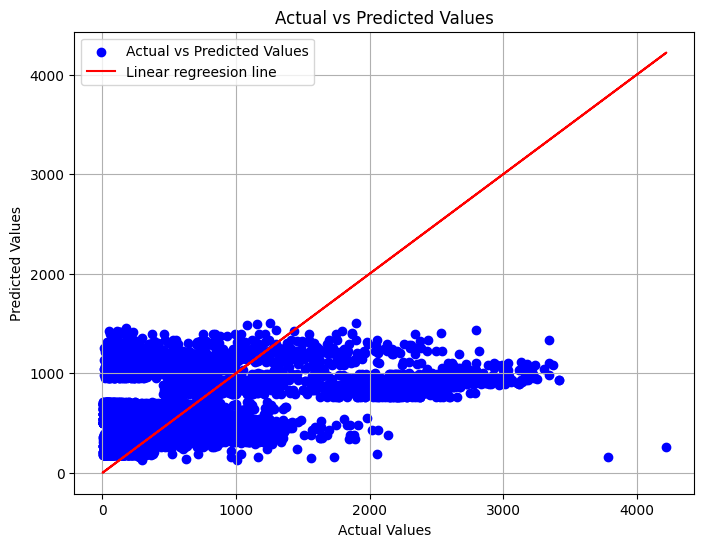

In [74]:
plt.figure(figsize=(8, 6))

# Scatter plot for actual values
plt.scatter(Y_test, Y_pred, color='blue', label='Actual vs Predicted Values')

# Adding a regression line
plt.plot(Y_test, Y_test, color='red', label='Linear regreesion line')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()